In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
Ad 1     10000 non-null int64
Ad 2     10000 non-null int64
Ad 3     10000 non-null int64
Ad 4     10000 non-null int64
Ad 5     10000 non-null int64
Ad 6     10000 non-null int64
Ad 7     10000 non-null int64
Ad 8     10000 non-null int64
Ad 9     10000 non-null int64
Ad 10    10000 non-null int64
dtypes: int64(10)
memory usage: 781.3 KB


In [4]:
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [8]:
# Play with random selection without any strategy
import random
total_reward = 0
ad_selected = []
for i in range(10000):
    ad = random.randrange(10)
    ad_selected.append(ad)
    total_reward += data.values[i, ad]

In [9]:
total_reward

1240

Text(0,0.5,'Number of selections')

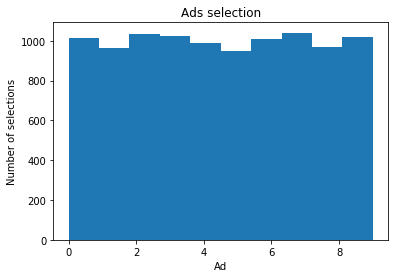

In [10]:
plt.hist(ad_selected)
plt.title('Ads selection')
plt.xlabel('Ad')
plt.ylabel('Number of selections')

### Upper Confidence Bound Algorithm

In [11]:
N = 10000
d = 10

In [26]:
import math
numbers_of_selections = [0] * d
rewards = [0] * d
ad_selected = []
for n in range(N):
    i = 0
    max_bound = 0
    for i in range(d):
        if numbers_of_selections[i] == 0:
            ad = i
            break
        average_reward = rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(3 / 2 * math.log(n + 1) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i
        max_bound, ad = (upper_bound, i) if upper_bound > max_bound else (max_bound, ad)
    ad_selected.append(ad)
    numbers_of_selections[ad] = numbers_of_selections[ad] + 1
    rewards[ad] = rewards[ad] + data.values[n, ad]

In [27]:
sum(rewards)

2178

Text(0,0.5,'Number of selections')

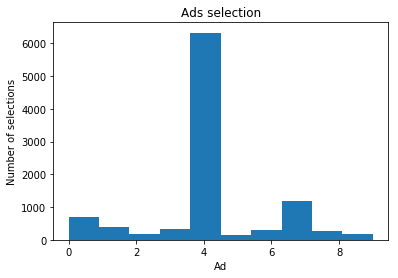

In [28]:
plt.hist(ad_selected)
plt.title('Ads selection')
plt.xlabel('Ad')
plt.ylabel('Number of selections')

In [33]:
import math
d, N = 10, 10000
selection_number = [0] *d
rewards = [0] *d

def get_ad(n):
    try:
        bounds = [
            rewards[i] / selection_number[i] + math.sqrt(3 / 2 * math.log(n) / selection_number[i])
            for i in range(d)
        ]
        return bounds.index(max(bounds))
    except ZeroDivisionError:
        return selection_number.index(0)

for n in range(N):
    ad = get_ad(n)
    selection_number[ad] += 1
    rewards[ad] += data.values[n, ad]

In [34]:
sum(rewards)

2211

Text(0,0.5,'Number of selections')

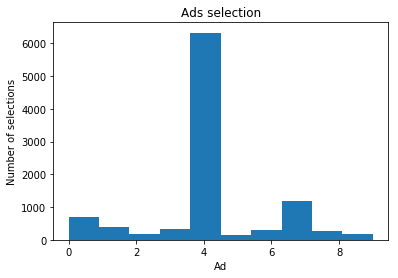

In [35]:
plt.hist(ad_selected)
plt.title('Ads selection')
plt.xlabel('Ad')
plt.ylabel('Number of selections')